In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc


%matplotlib inline

In [2]:
df_math = pd.read_csv('student-mat.csv')
df_port = pd.read_csv('student-por.csv')


In [3]:
cat_data = pd.get_dummies(df_port[['school', 'sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']],drop_first=True)
nominal_cat = pd.get_dummies(df_port[['Mjob','Fjob','reason','guardian']],drop_first=True)
numeric_data = df_port[['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','absences','failures']]

In [4]:
grades = pd.DataFrame()
#pass = 0, fail = 1
def passfail(grade):
    if grade >=10:
        return 0
    if grade <10:
        return 1
grades['G1'] = df_port['G1'].apply(passfail)
grades['G2'] = df_port['G2'].apply(passfail)
grades['G3'] = df_port['G3'].apply(passfail)

In [5]:
df = pd.concat([grades, cat_data,numeric_data, nominal_cat], axis = 1)
df.head()


,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


## Train Test Split

In [6]:
X = df.drop(['G1','G2','G3'], axis = 1)
y = df['G1']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### with normalization

In [8]:
normalizer = preprocessing.Normalizer()
X_norm = normalizer.fit_transform(X)

In [9]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [10]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression with Regularization

In [74]:
Cs = np.logspace(-4., 4., 30)
logCV = LogisticRegressionCV(cv=10, Cs = Cs)

In [75]:
logCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([  1.00000e-04,   1.88739e-04,   3.56225e-04,   6.72336e-04,
         1.26896e-03,   2.39503e-03,   4.52035e-03,   8.53168e-03,
         1.61026e-02,   3.03920e-02,   5.73615e-02,   1.08264e-01,
         2.04336e-01,   3.85662e-01,   7.27895e-01,   1.37382e+00,
         2.59294e+00,   4.893...     4.17532e+02,   7.88046e+02,   1.48735e+03,   2.80722e+03,
         5.29832e+03,   1.00000e+04]),
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [101]:
y_pred_logCV = logCV.predict(X_test)

#best score
logCV.C_

array([ 9.23670857])

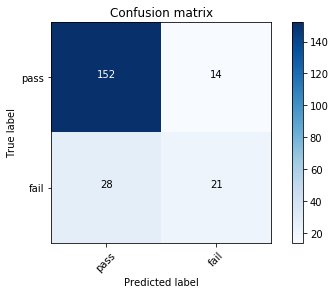

In [77]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_logCV), ['pass', 'fail'])

## Random Forest GridsearchCV

In [47]:
rfc = RandomForestClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63, 100, 150],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

{'max_depth': 15, 'n_estimators': 18}


best parameters = 'max_depth': 15, 'n_estimators': 18

## Gradient Boosting

In [22]:
gb = GradientBoostingClassifier(random_state=1,n_estimators =100)

In [83]:
param_grid = {'max_depth': range(5,15), 'min_samples_split': range(5,10,1), 'learning_rate': [ 0.01, 0.1, 0.2, 0.3]}
 
grid = GridSearchCV(gb, param_grid, cv=10,scoring= 'roc_auc')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15), 'min_samples_split': range(5, 10), 'learning_rate': [0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [84]:
print (grid.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 9}


best parameters = 'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 9

In [91]:
gb_grid = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, min_samples_split = 9)
gb_grid.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=9,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Naive Bayes

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

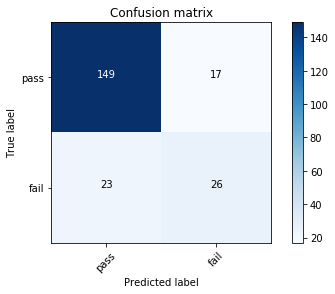

In [26]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_gnb), ['pass', 'fail'])

## Models Comparison

In [87]:
models = [LogisticRegressionCV(cv=10, Cs = Cs),
          GaussianNB(),
          RandomForestClassifier(max_depth=15, n_estimators=18),
          GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, min_samples_split = 9)]

model_names = ['Logistic', 'Naive Bayes','Random Forest','Gradient Boosting']

In [110]:
accuracy = []
cutoff_accuracy = []
precision_pass = []
precision_fail = []
recall_pass = []
recall_fail = []
f1_pass = []
f1_fail = []
auc = []
threshold = 0.3

## Go through the models and find the scores
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    #predict with custom threshold
    y_pred_cutoff = np.where(y_pred_prob >= threshold, 1, 0)
    
    cutoff_accuracy.append( accuracy_score(y_test, y_pred_cutoff) )
    accuracy.append( accuracy_score(y_test, y_pred) )
    
    precision_pass.append( precision_score(y_test, y_pred_cutoff, pos_label=0) )
    precision_fail.append( precision_score(y_test, y_pred_cutoff, pos_label=1) )
    recall_pass.append( recall_score(y_test, y_pred_cutoff, pos_label=0))
    recall_fail.append( recall_score(y_test, y_pred_cutoff, pos_label=1))
    f1_pass.append( f1_score(y_test, y_pred_cutoff, pos_label=0) )
    f1_fail.append( f1_score(y_test, y_pred_cutoff, pos_label=1) )
    auc.append(roc_auc_score(y_test, y_pred_prob))

accuracy_df = pd.DataFrame({'accuracy':accuracy, 'auc':auc, 'precision-pass':precision_pass, 'precision-fail':precision_fail,
                            'recall-pass':recall_pass, 'recall-fail':recall_fail, 'f1-pass':f1_pass, 'f1-fail':f1_fail})
accuracy_df.set_index([model_names])

,accuracy,auc,f1-fail,f1-pass,precision-fail,precision-pass,recall-fail,recall-pass
Logistic,0.804651,0.809934,0.556701,0.870871,0.562500,0.868263,0.551020,0.873494
Naive Bayes,0.813953,0.807475,0.600000,0.878788,0.588235,0.884146,0.612245,0.873494
Random Forest,0.795349,0.832432,0.607143,0.861635,0.539683,0.901316,0.693878,0.825301
Gradient Boosting,0.800000,0.810610,0.565657,0.870091,0.560000,0.872727,0.571429,0.867470


### ROC Curve

In [111]:
## Calc and store each ROC and AUC
fpr_list = []
tpr_list = []
auc_list = []
for model in models:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(round(metrics.auc(fpr, tpr),4))

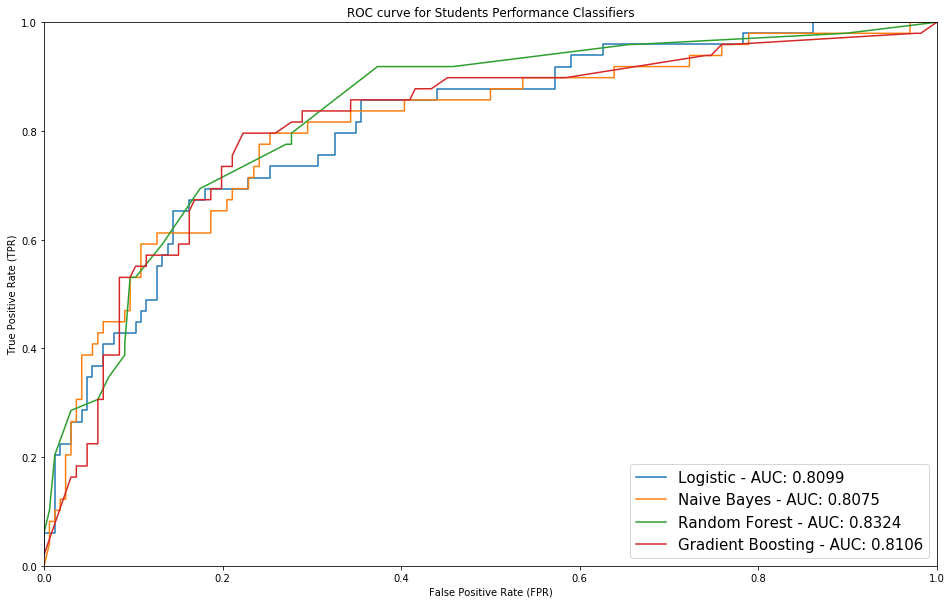

In [112]:
## Plot them all on 1 graph
plt.figure(figsize=(16,10))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve for Students Performance Classifiers')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label = model_names[i] + ' - AUC: ' + str(auc_list[i]))
plt.legend(loc = 4, fontsize = 15)